In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([ 1.,  4.,  6.,  8., 19., 17., 21., 11.,  6.,  7.]),
 array([ 89.52101958,  91.3098289 ,  93.09863821,  94.88744753,
         96.67625685,  98.46506616, 100.25387548, 102.04268479,
        103.83149411, 105.62030342, 107.40911274]),
 <a list of 10 Patch objects>)

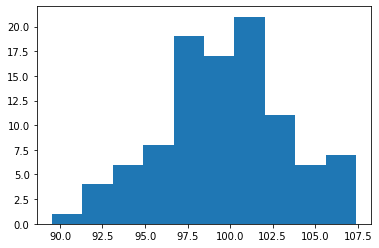

In [16]:
rng = np.random.RandomState(42)
X = rng.normal(100, 4, size=100)
plt.hist(X)

In [24]:
X_axis = np.linspace(90, 120, 100)
gaussian = [norm(x).pdf(x) for x in X]

In [25]:
gaussian

[0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804014327,
 0.3989422804